In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

autos = pd.read_csv('autos.csv',sep=',',encoding='Latin1')
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [2]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
autos.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [4]:
print(len(autos.groupby('name').size()))

233531


### with so many unique names in the dataset, I don't think I can extract any useful info from these strings.

In [5]:
autos=autos.drop('name',1)

In [6]:
print(autos.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


### there only three gewerblich seller , compared to the 370000+ data, I decide to leave it behind, that is to say all sellers would be private

In [7]:
autos= autos.drop('seller',1)

In [8]:
print(autos.groupby('offerType').size())

offerType
Angebot    371516
Gesuch         12
dtype: int64


### with the same reason above , I would discard these 12 Gesuch offerType 

In [9]:
autos=autos.drop('offerType',1)

In [10]:
print(autos['nrOfPictures'].sum())

0


### the values of nrOfPictures column are all 0, which seems unreasonable,so we're going to drop it

In [11]:
autos=autos.drop('nrOfPictures',1)

### abtest will be removed as the descriptin of dataset, it doesn't do any contribution

In [12]:
autos=autos.drop('abtest',1)

### I would also remove the postalCode, dateCreated, dateCrawled,lastSeen columns from the dataframe

In [13]:
autos.drop(['dateCrawled','dateCreated','lastSeen','postalCode'],axis='columns',inplace=True)

In [14]:
sample_autos=autos.sample(n=10000, random_state=1)

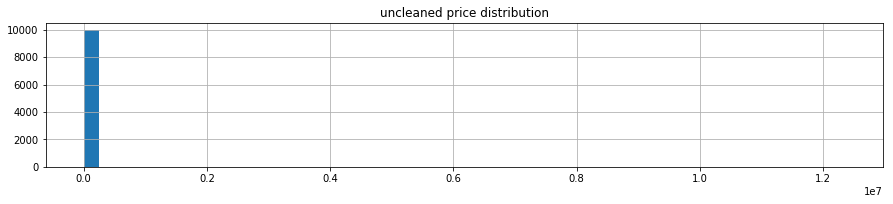

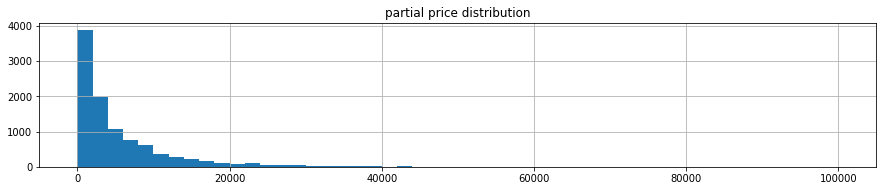

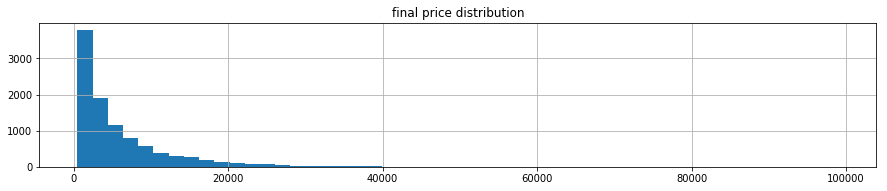

In [15]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.subplot(3,1,1)
sample_autos['price'].hist(bins=50)
plt.title('uncleaned price distribution')
plt.show()

autos=autos[autos.price < 100000]
sample_autos=autos.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_autos['price'].hist(bins=50)
plt.title('partial price distribution')
plt.show()

autos=autos[autos.price > 500]
sample_autos=autos.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_autos['price'].hist(bins=50)
plt.title('final price distribution')
plt.show()

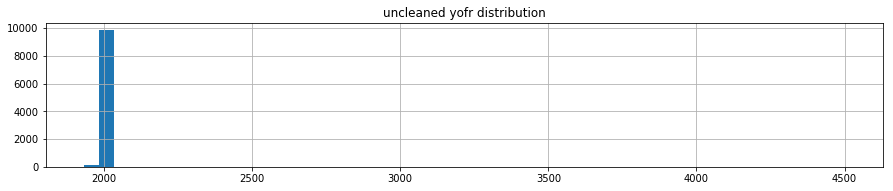

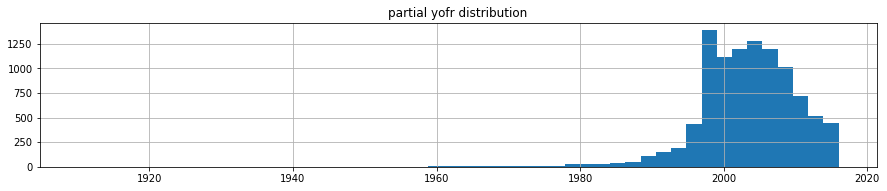

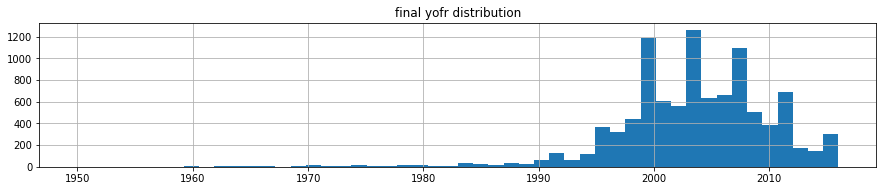

In [16]:
plt.subplot(3,1,1)
sample_autos=autos.sample(n=10000, random_state=1)
sample_autos['yearOfRegistration'].hist(bins=50)
plt.title('uncleaned yofr distribution')
plt.show()

autos=autos[autos.yearOfRegistration <= 2016]
sample_autos=autos.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_autos['yearOfRegistration'].hist(bins=50)
plt.title('partial yofr distribution')
plt.show()

autos=autos[autos.yearOfRegistration >= 1950]
sample_autos=autos.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_autos['yearOfRegistration'].hist(bins=50)
plt.title('final yofr distribution')
plt.show()

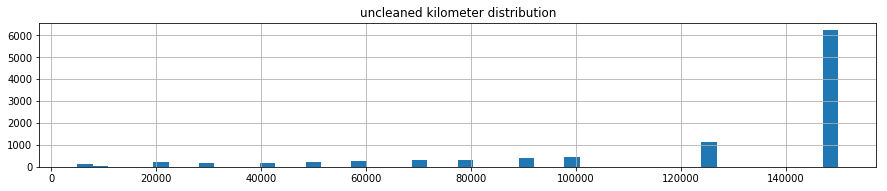

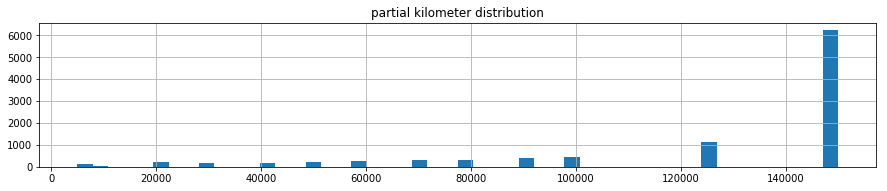

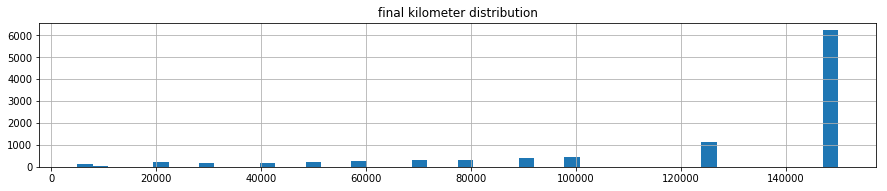

In [17]:
plt.subplot(3,1,1)
sample_autos=autos.sample(n=10000, random_state=1)
sample_autos['kilometer'].hist(bins=50)
plt.title('uncleaned kilometer distribution')
plt.show()

autos=autos[autos.kilometer <= 200000]
sample_autos=autos.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_autos['kilometer'].hist(bins=50)
plt.title('partial kilometer distribution')
plt.show()

autos=autos[autos.kilometer >= 2000]
sample_autos=autos.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_autos['kilometer'].hist(bins=50)
plt.title('final kilometer distribution')
plt.show()

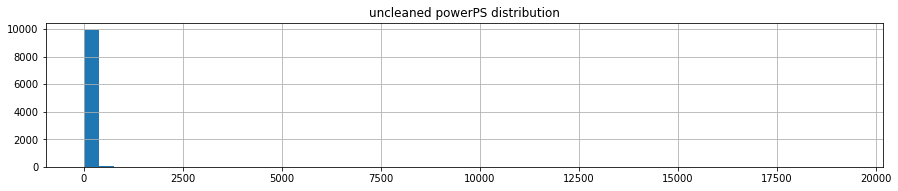

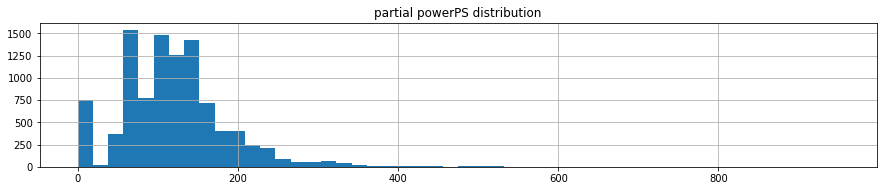

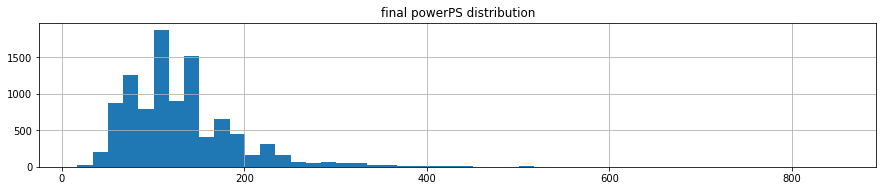

In [18]:
plt.subplot(3,1,1)
sample_autos=autos.sample(n=10000, random_state=1)
sample_autos['powerPS'].hist(bins=50)
plt.title('uncleaned powerPS distribution')
plt.show()

autos=autos[autos.powerPS <= 1000]
sample_autos=autos.sample(n=10000, random_state=1)

plt.subplot(3,1,2)
sample_autos['powerPS'].hist(bins=50)
plt.title('partial powerPS distribution')
plt.show()

autos=autos[autos.powerPS >= 10]
sample_autos=autos.sample(n=10000, random_state=1)

plt.subplot(3,1,3)
sample_autos['powerPS'].hist(bins=50)
plt.title('final powerPS distribution')
plt.show()

In [19]:
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,290912.000000,290912.000000,290912.000000,290912.000000,290912.000000
mean,6617.506988,2003.513578,129.666274,124452.016417,6.090698
std,7874.626511,6.701452,62.448368,39646.577096,3.535533
min,501.000000,1950.000000,10.000000,5000.000000,0.000000
25%,1700.000000,2000.000000,86.000000,100000.000000,3.000000
50%,3900.000000,2004.000000,116.000000,150000.000000,6.000000
75%,8500.000000,2008.000000,156.000000,150000.000000,9.000000
max,99999.000000,2016.000000,1000.000000,150000.000000,12.000000


In [20]:
cleanedAutos=autos
cleanedAutos.isnull().sum()

price                      0
vehicleType             8221
yearOfRegistration         0
gearbox                 4500
powerPS                    0
model                   9931
kilometer                  0
monthOfRegistration        0
fuelType               12500
brand                      0
notRepairedDamage      36424
dtype: int64

In [21]:
dcAutos=cleanedAutos.dropna()
dcAutos.isnull().sum()

price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [22]:
dcAutos['price'].count()

236706

gearbox
manuell      179284
automatik     57422
Name: gearbox, dtype: int64


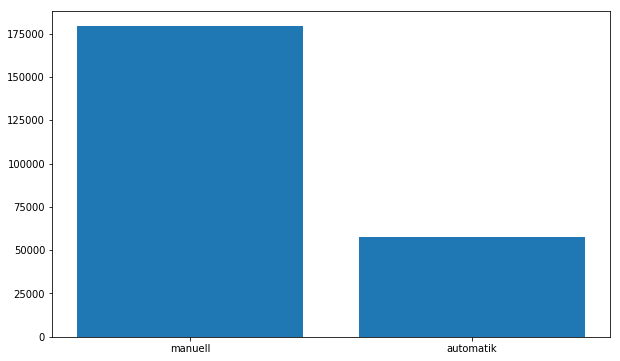

model
golf      19158
andere    17969
3er       14600
a4         7427
polo       7347
Name: model, dtype: int64


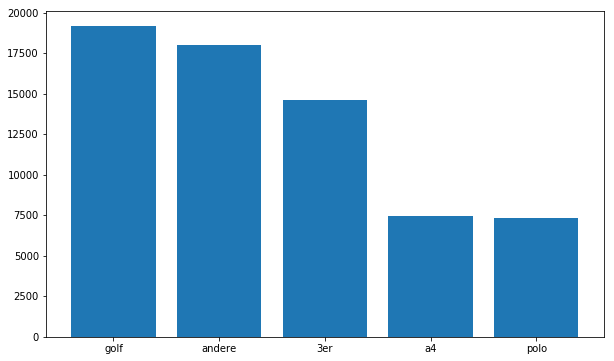

brand
volkswagen       49494
bmw              28769
mercedes_benz    25328
audi             23484
opel             22491
Name: brand, dtype: int64


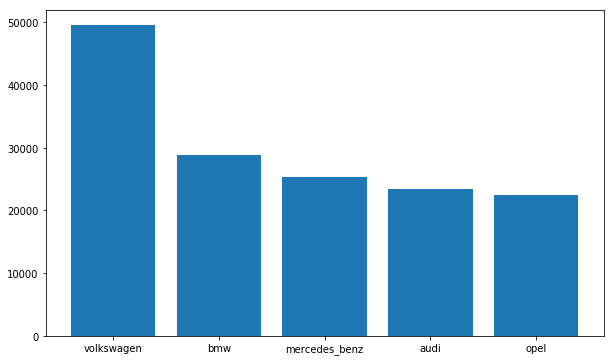

vehicleType
limousine     70279
kleinwagen    49827
kombi         49063
bus           23497
cabrio        17726
Name: vehicleType, dtype: int64


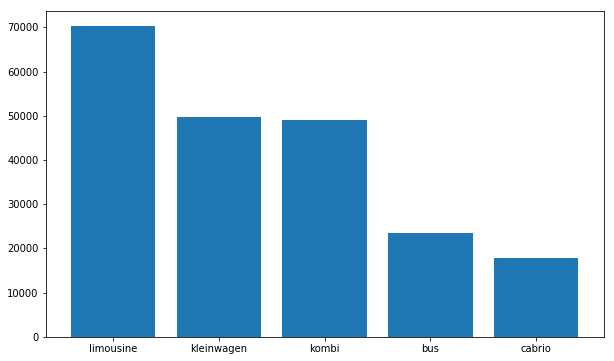

fuelType
benzin    149177
diesel     83183
lpg         3630
cng          422
hybrid       196
Name: fuelType, dtype: int64


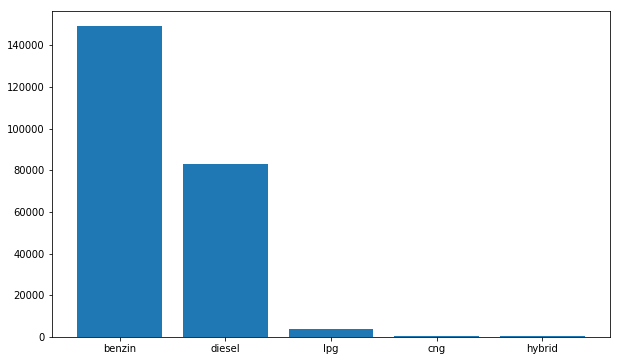

notRepairedDamage
nein    217573
ja       19133
Name: notRepairedDamage, dtype: int64


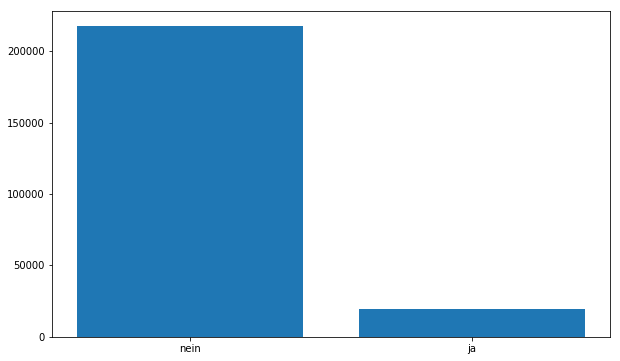

In [23]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = dcAutos[c].unique()
    
    g = dcAutos.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(10,6))
    plt.bar(r, g.head()) 
    plt.xticks(r, g.index)
    plt.show()

In [25]:
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer

labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dcAutos[l])
    tr = les[l].transform(dcAutos[l]) 
    dcAutos.loc[:, l + '_feature'] = pd.Series(tr, index=dcAutos.index)

labeled = dcAutos[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'] 
                    + [x+"_feature" for x in labels]]

/Users/zhixinwang/Documents/anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/zhixinwang/Documents/anaconda/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [31]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    plt.show()

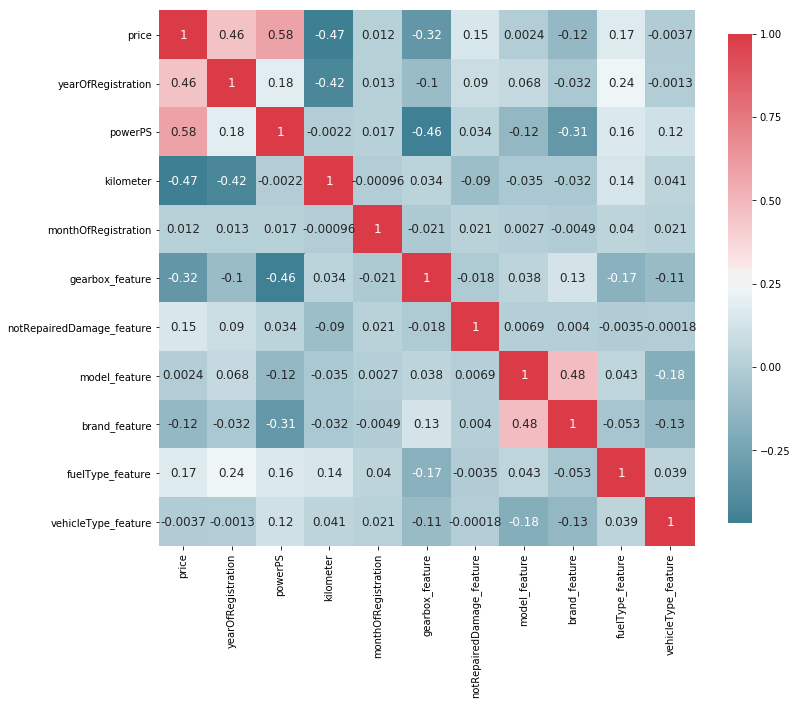

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,gearbox_feature,notRepairedDamage_feature,model_feature,brand_feature,fuelType_feature,vehicleType_feature
price,1.000000,0.458581,0.582853,-0.467532,0.011516,-0.320055,0.146067,0.002400,-0.122001,0.170013,-0.003669
yearOfRegistration,0.458581,1.000000,0.184110,-0.419709,0.013429,-0.101833,0.090053,0.068466,-0.032018,0.235208,-0.001264
powerPS,0.582853,0.184110,1.000000,-0.002234,0.016751,-0.458555,0.034365,-0.124205,-0.313675,0.161492,0.116814
kilometer,-0.467532,-0.419709,-0.002234,1.000000,-0.000960,0.033658,-0.090477,-0.034875,-0.032129,0.139424,0.040907
monthOfRegistration,0.011516,0.013429,0.016751,-0.000960,1.000000,-0.020526,0.020526,0.002718,-0.004912,0.039501,0.020633
gearbox_feature,-0.320055,-0.101833,-0.458555,0.033658,-0.020526,1.000000,-0.018022,0.038030,0.128384,-0.166033,-0.110802
notRepairedDamage_feature,0.146067,0.090053,0.034365,-0.090477,0.020526,-0.018022,1.000000,0.006917,0.003961,-0.003540,-0.000180
model_feature,0.002400,0.068466,-0.124205,-0.034875,0.002718,0.038030,0.006917,1.000000,0.481465,0.042688,-0.183021
brand_feature,-0.122001,-0.032018,-0.313675,-0.032129,-0.004912,0.128384,0.003961,0.481465,1.000000,-0.053069,-0.126594
fuelType_feature,0.170013,0.235208,0.161492,0.139424,0.039501,-0.166033,-0.003540,0.042688,-0.053069,1.000000,0.038535


In [33]:
plot_correlation_map(labeled)
labeled.corr()

In [34]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                      0.582853
kilometer                    0.467532
yearOfRegistration           0.458581
gearbox_feature              0.320055
fuelType_feature             0.170013
notRepairedDamage_feature    0.146067
brand_feature                0.122001
monthOfRegistration          0.011516
vehicleType_feature          0.003669
model_feature                0.002400
Name: price, dtype: float64

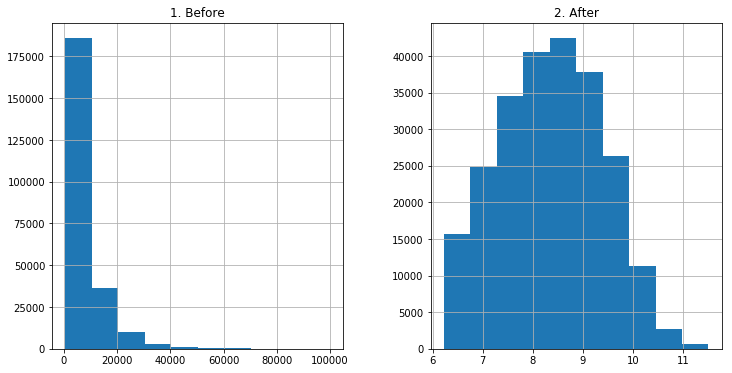

In [40]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split
Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()
Y = np.log1p(Y)
plt.show()

In [41]:
def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

test_size = .33
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
r = range(2003, 2017)
km_year = 10000

(158593, 10) (78113, 10) (158593,) (78113,)


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.3min finished


In [45]:
print(gs.best_score_)
print(gs.best_params_)

0.860079726954
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [46]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature importance outcome:
1. feature 0 (0.666965)
2. feature 1 (0.239981)
3. feature 9 (0.026550)
4. feature 5 (0.020992)
5. feature 7 (0.018240)
6. feature 2 (0.013680)
7. feature 6 (0.010152)
8. feature 8 (0.001941)
9. feature 3 (0.000834)
10. feature 4 (0.000667)
['yearOfRegistration' 'powerPS' 'kilometer' 'monthOfRegistration'
 'gearbox_feature' 'notRepairedDamage_feature' 'model_feature'
 'brand_feature' 'fuelType_feature' 'vehicleType_feature']


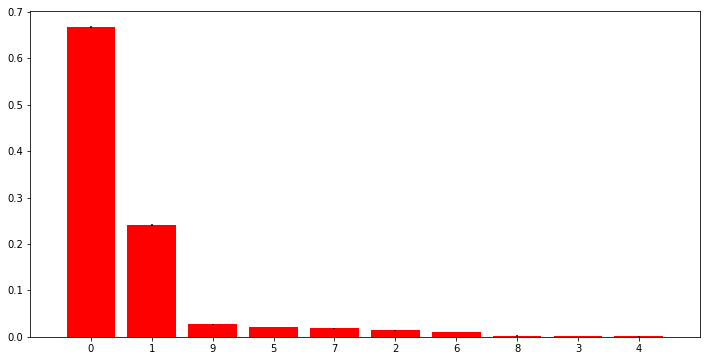

In [47]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature importance outcome:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print(X_train.columns.values)

plt.figure()
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()